# Schelling Segregation Model



In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from Schelling import SchellingModel

Now we instantiate a model instance: a 10x10 grid, with an 80% change of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 3 similar neighbors.

In [6]:
model = SchellingModel(20, 20, 0.85, 0.2, 3)

In [7]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps) # Show how many steps have actually run

100


In [8]:
model_out = model.datacollector.get_model_vars_dataframe()

In [9]:
model_out.head()

,unhappy
0,57
1,43
2,42
3,35
4,30


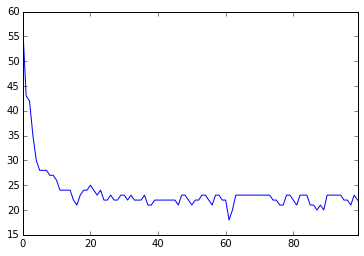

In [10]:
model_out.unhappy.plot()

In [11]:
x_positions = model.datacollector.get_agent_vars_dataframe()

# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [12]:
from mesa.batchrunner import BatchRunner

In [13]:
def get_segregation(model):
    '''
    Find the % of agents that only have neighbors of their same type.
    '''
    segregated_agents = 0
    for agent in model.schedule.agents:
        segregated = True
        for neighbor in model.grid.neighbor_iter(agent.pos[0], agent.pos[1]):
            if neighbor.type != agent.type:
                segregated = False
                break
        if segregated:
            segregated_agents += 1
    return segregated_agents / model.schedule.get_agent_count()

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [14]:
parameters = {"height": 10, "width": 10, "density": 0.8, "minority_pc": 0.2, 
              "homophily": range(1,9)}

In [15]:
model_reporters = {"Segregated_Agents": get_segregation}

In [16]:
param_sweep = BatchRunner(SchellingModel, parameters, iterations=10, 
                          max_steps=200,
                          model_reporters=model_reporters)

In [17]:
param_sweep.run_all()

In [18]:
df = param_sweep.get_model_vars_dataframe()

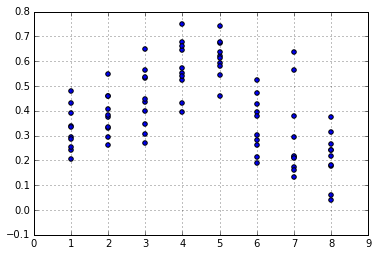

In [19]:
plt.scatter(df.homophily, df.Segregated_Agents)
plt.grid(True)

## Other Packages

In [21]:
import numpy as np
import holoviews as hv
%load_ext holoviews.ipython

In [22]:
def get_color(agent):
    if agent is None: 
        return 0
    elif agent.type == 0:
        return 1
    elif agent.type == 1:
        return 2

In [23]:
def get_grid(model):
    width = model.grid.width
    height = model.grid.height
    data = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            data[x][y] = get_color(model.grid[y][x])
    return data

In [24]:
hmap = hv.HoloMap()
model = SchellingModel(20, 20, 0.80, 0.2, 3)
for i in range(100):
    data = get_grid(model)
    hmap[i] = hv.Image(data)
    model.step()

:HoloMap   [Default]
   :Image   [x,y]   (z)
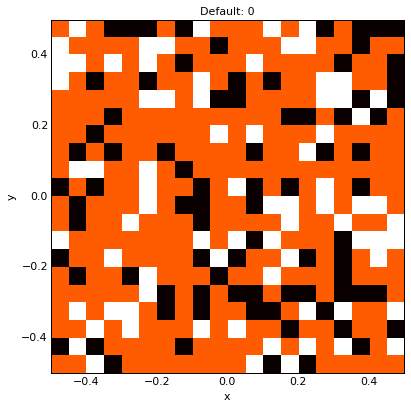
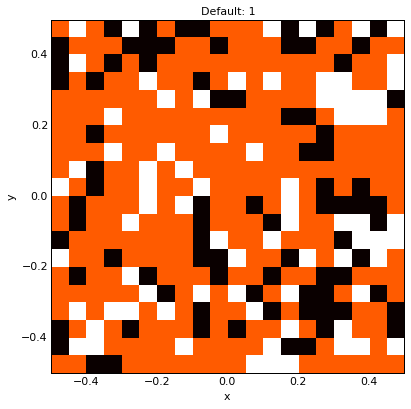
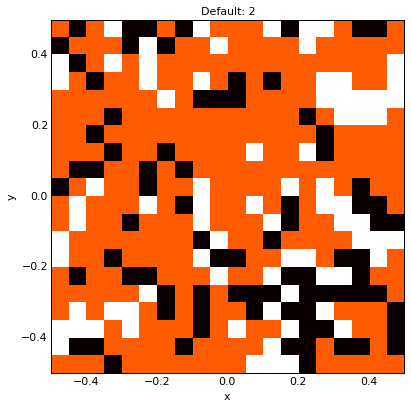
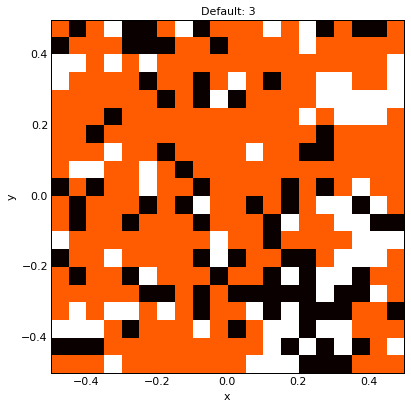
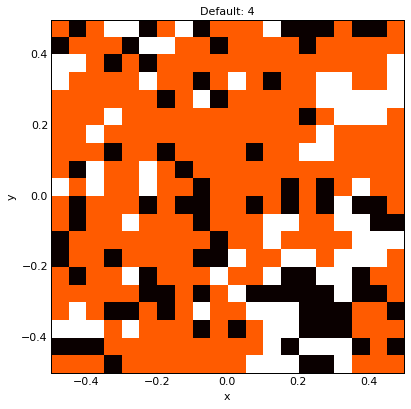
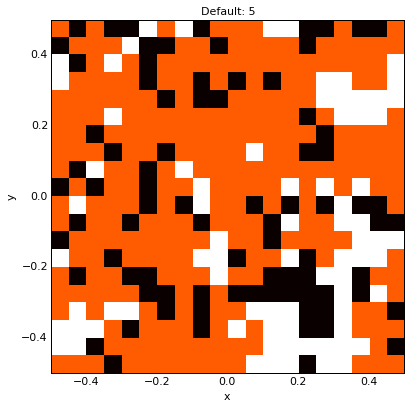
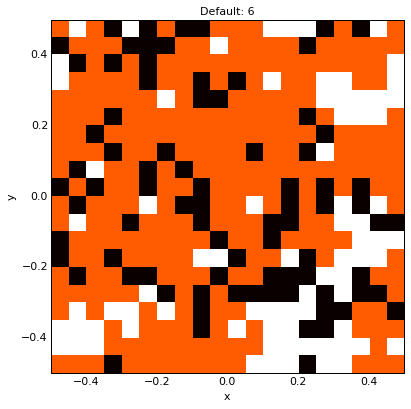
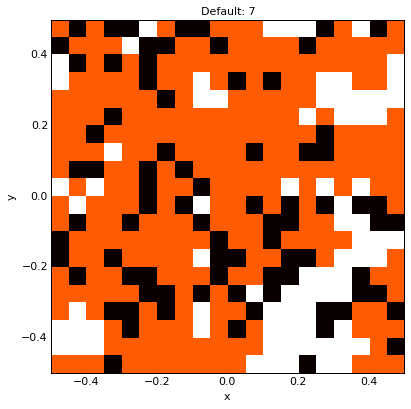
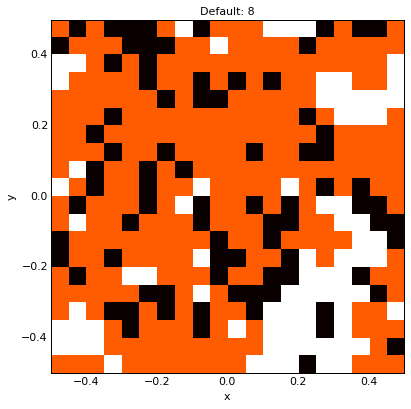
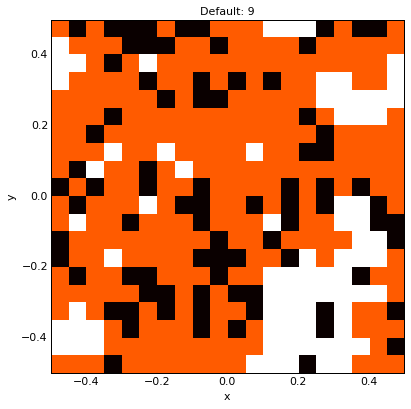
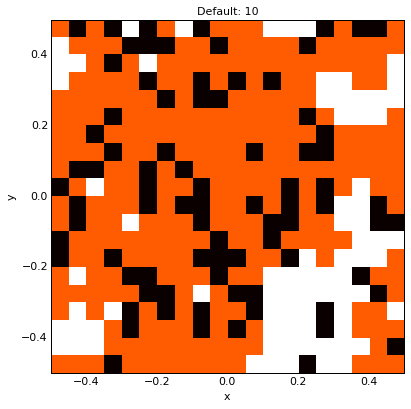
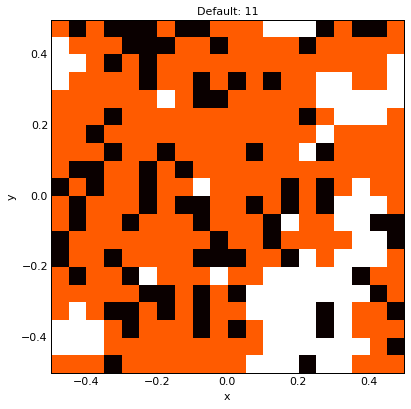
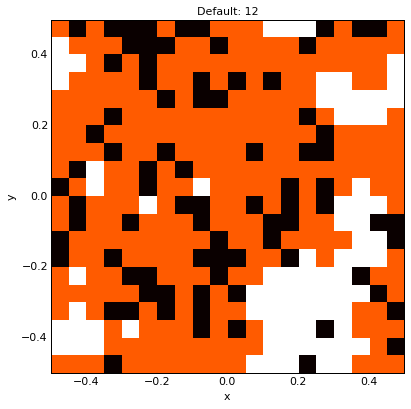
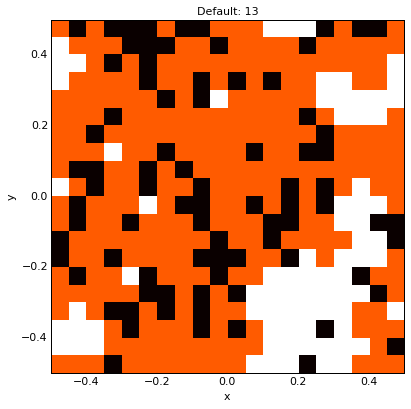
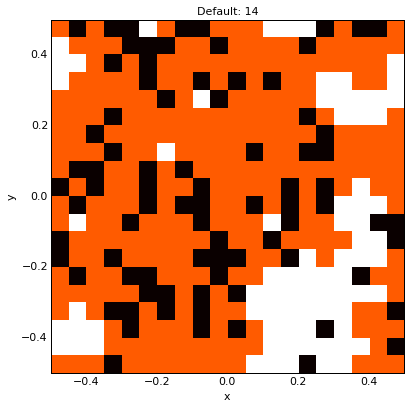
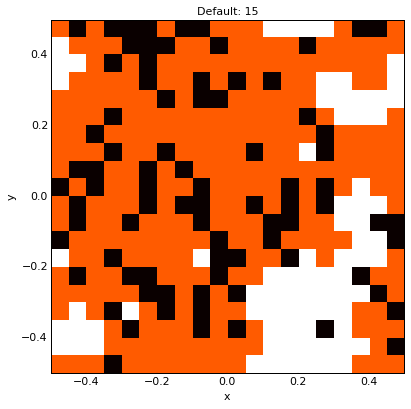
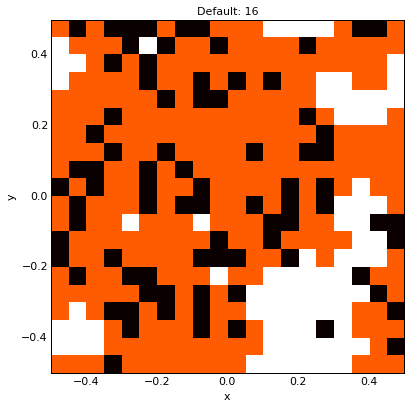
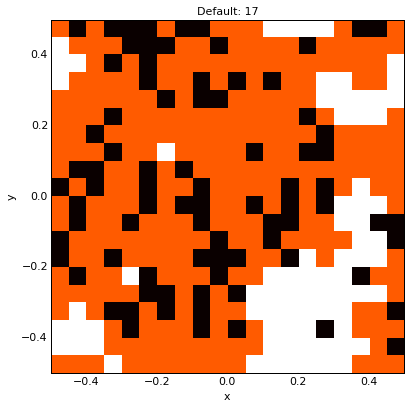
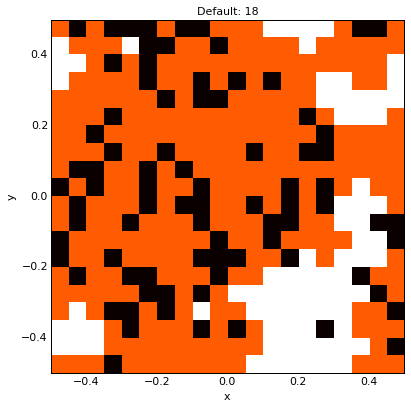
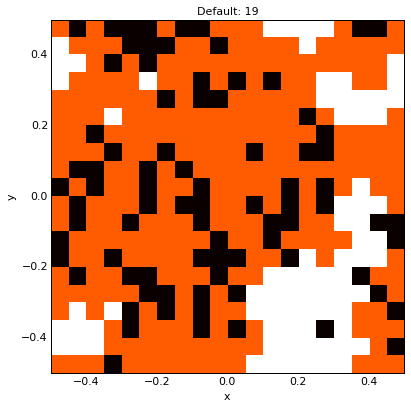
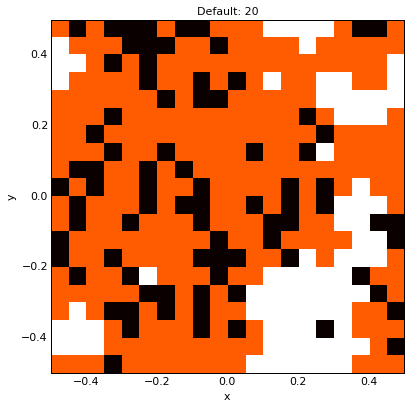
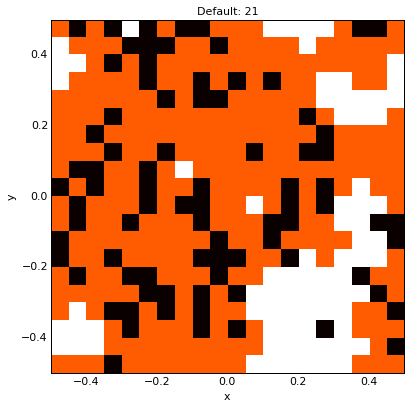
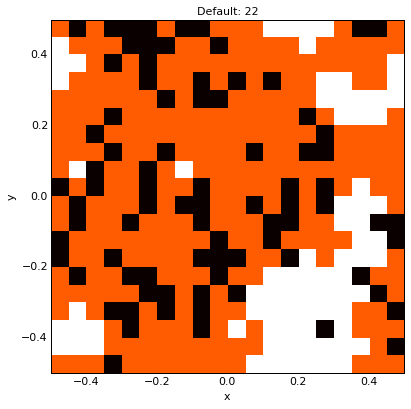
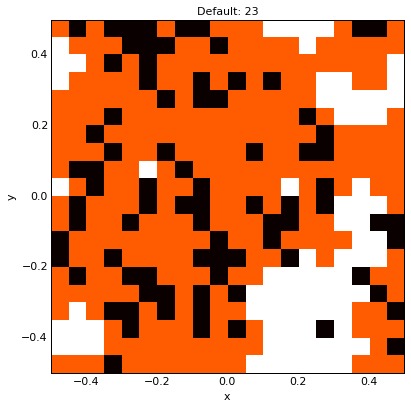
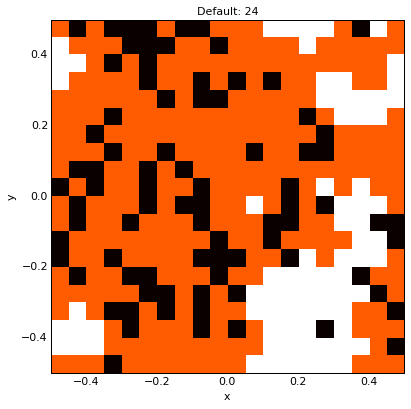
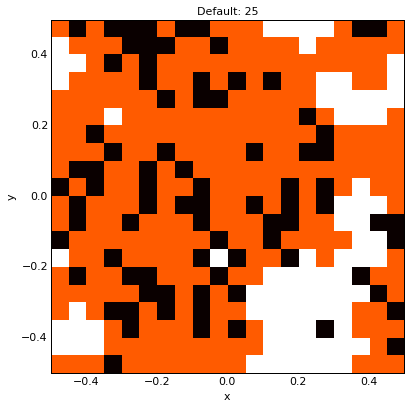
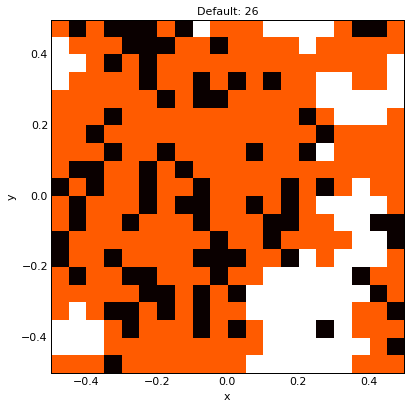
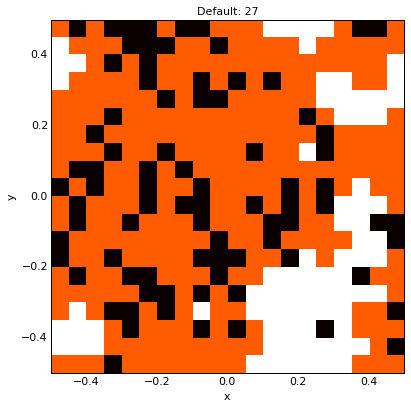
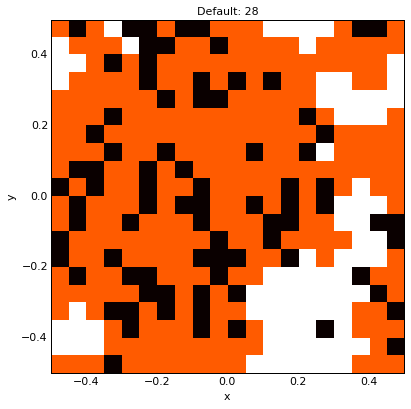
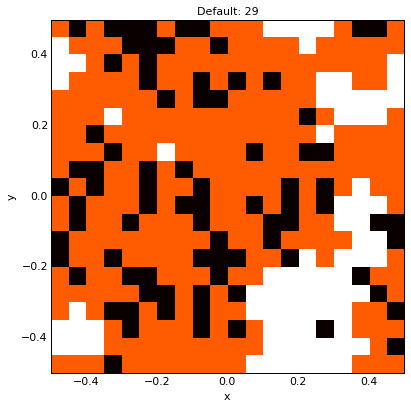
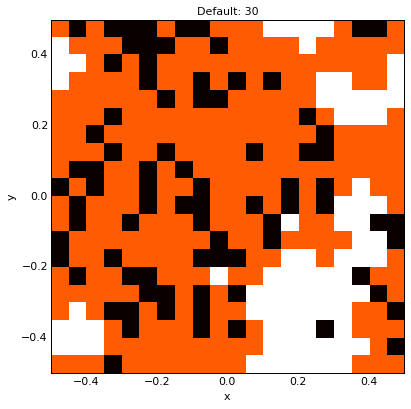
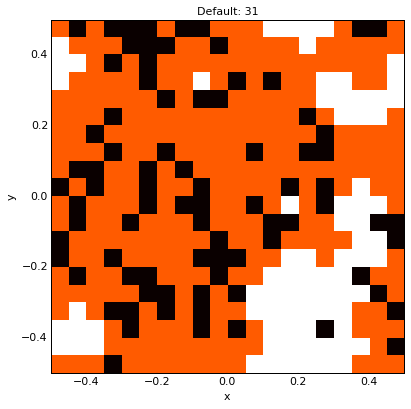
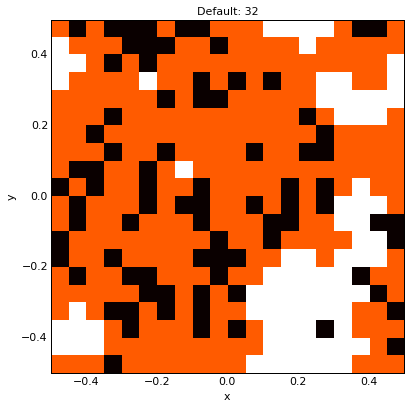
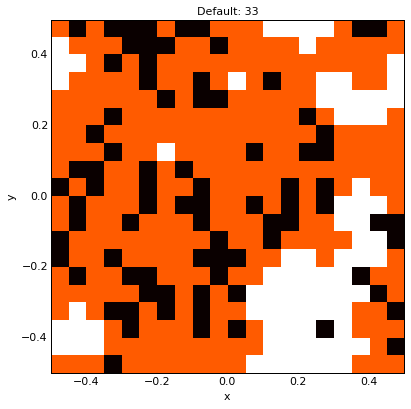
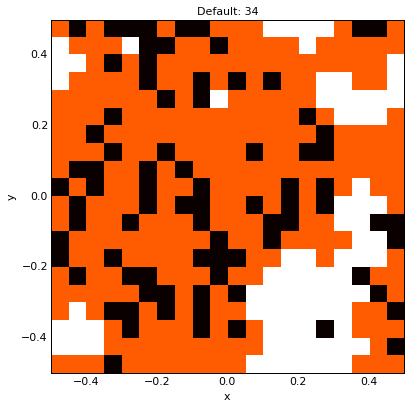
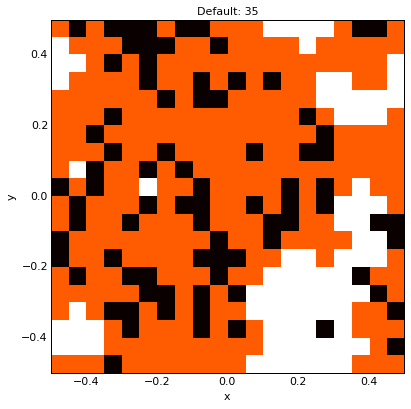
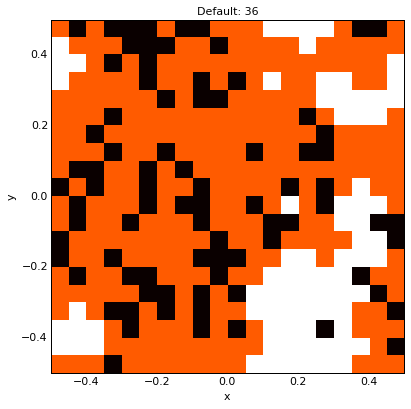
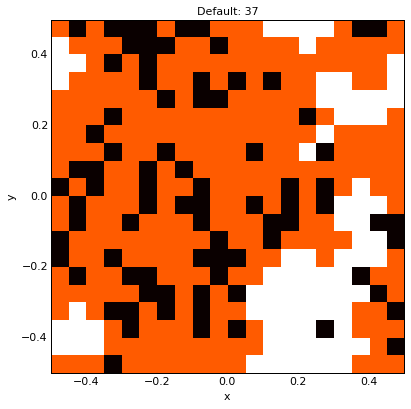
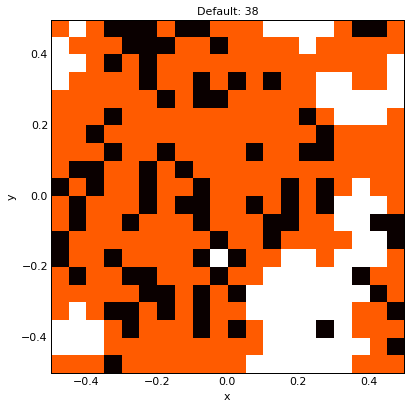
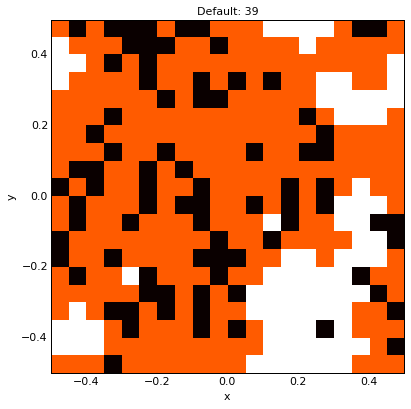
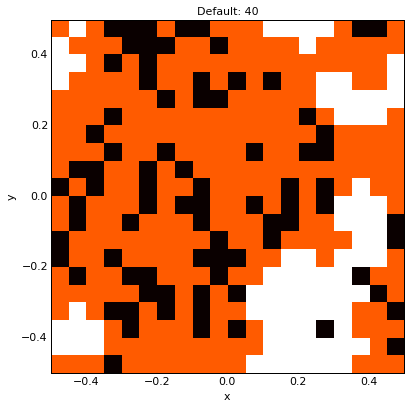
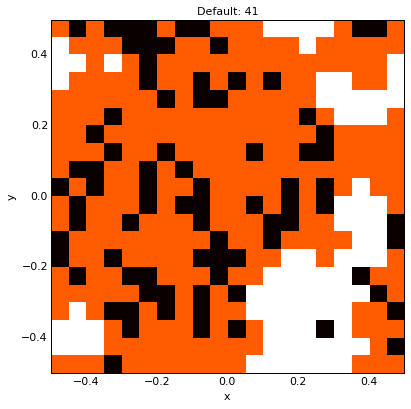
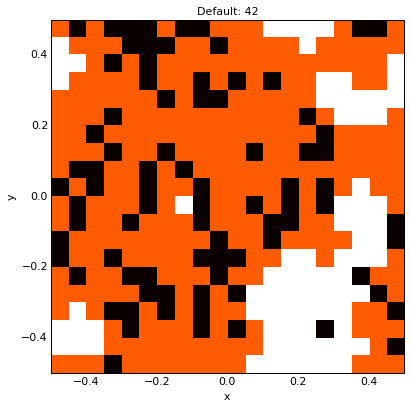
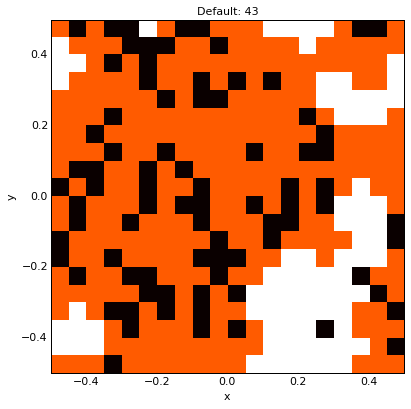
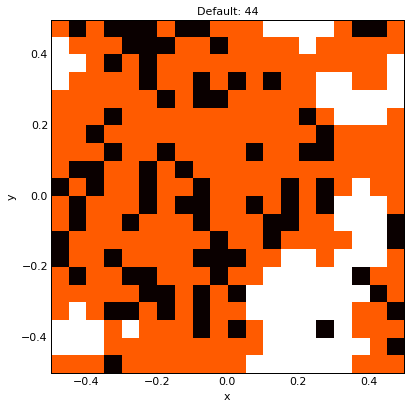
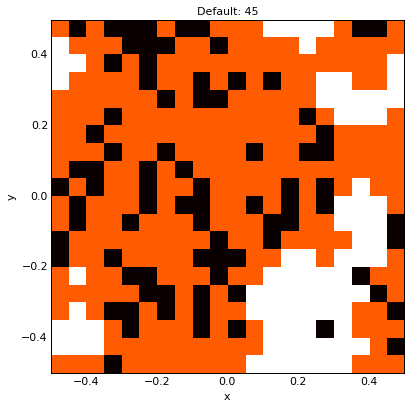
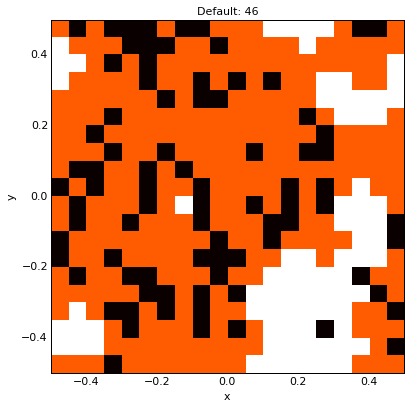
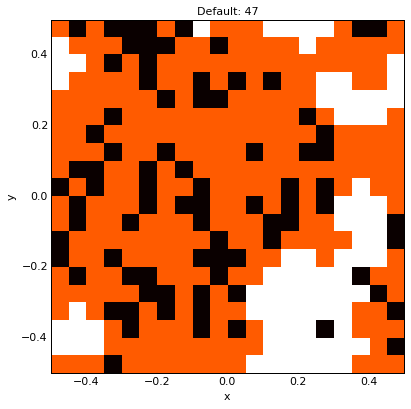
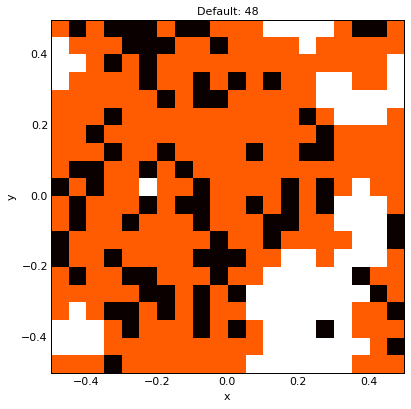
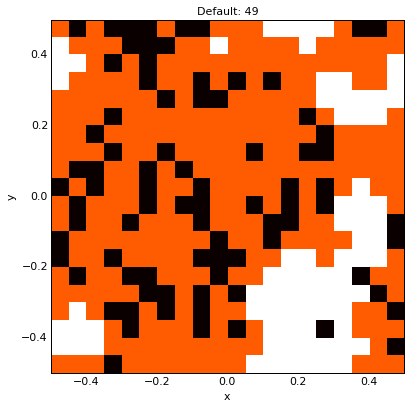
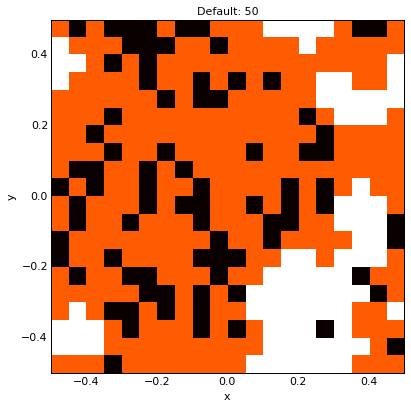
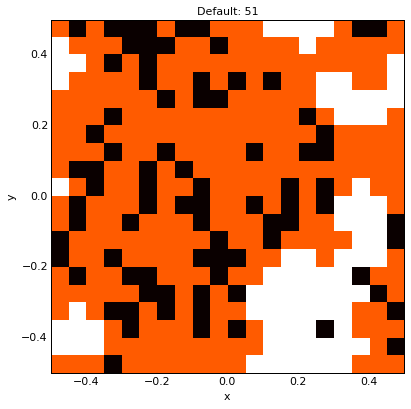
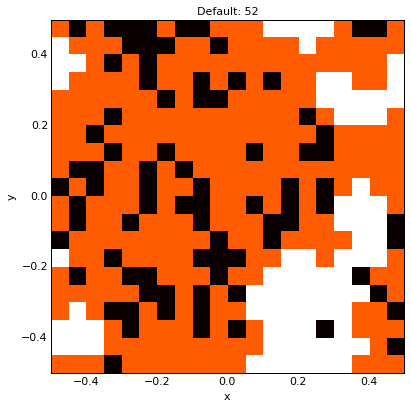
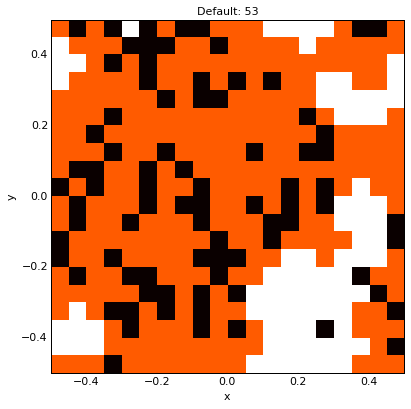
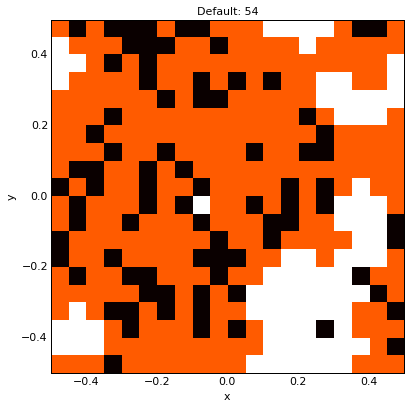
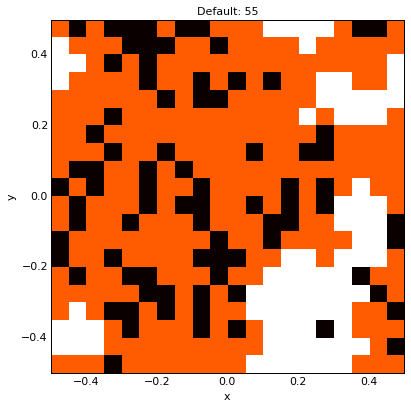
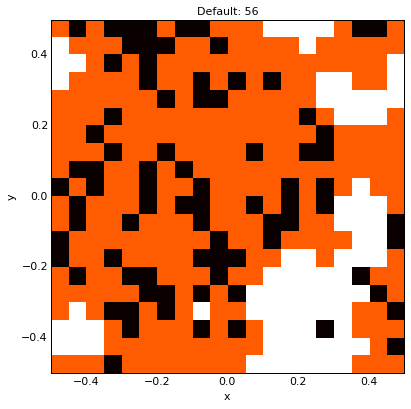
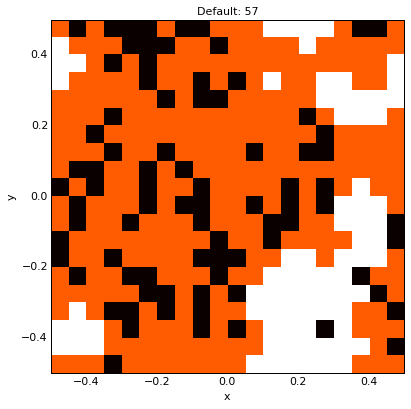
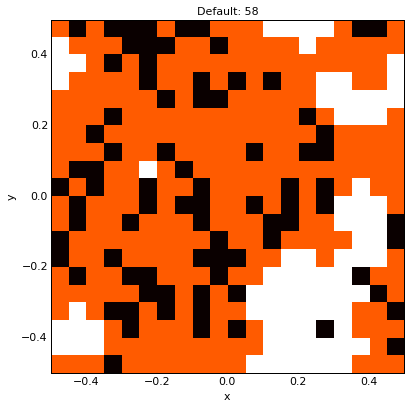
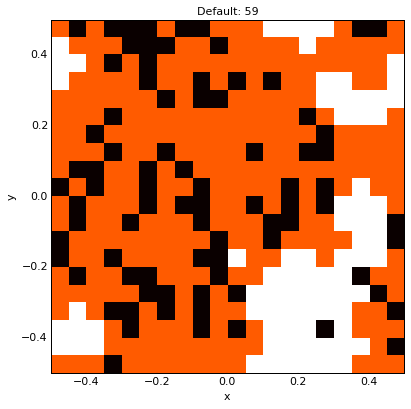
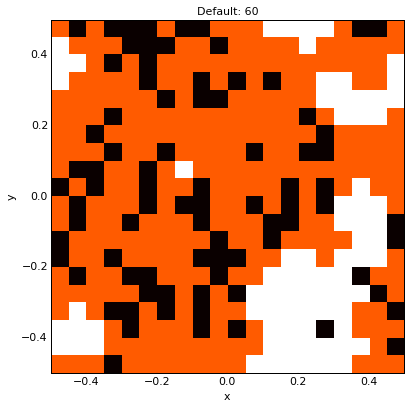
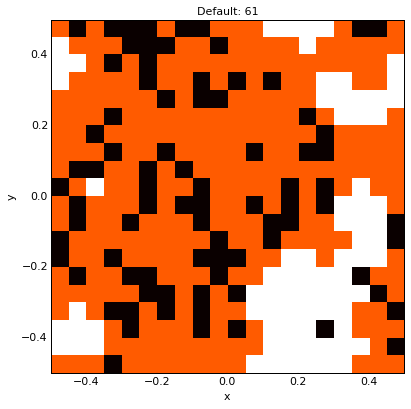
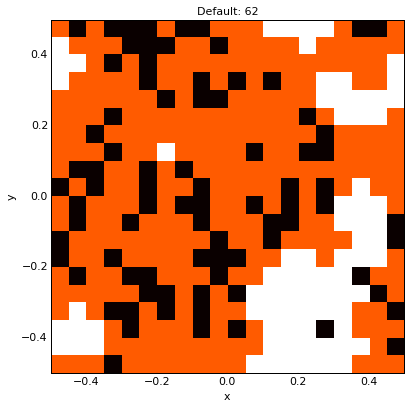
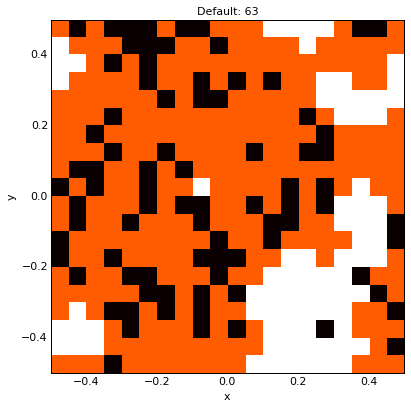
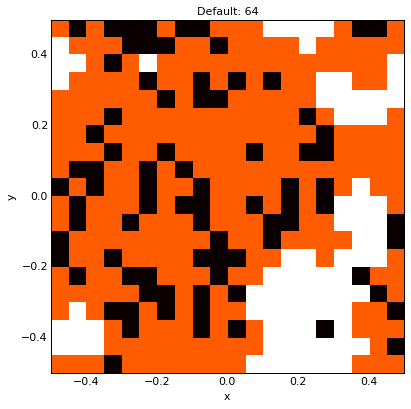
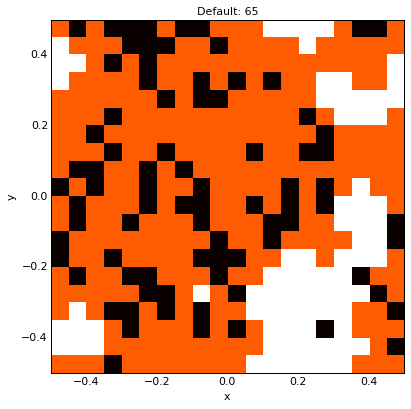
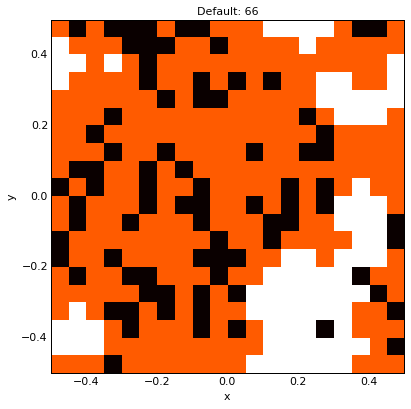
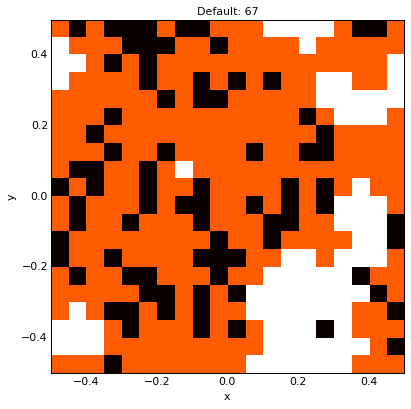
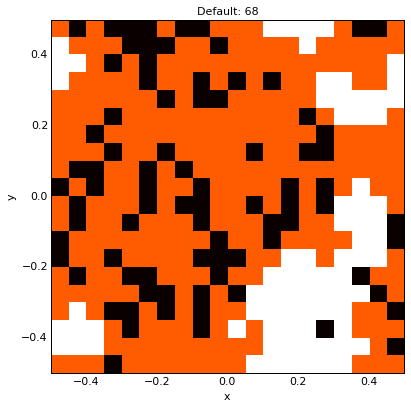
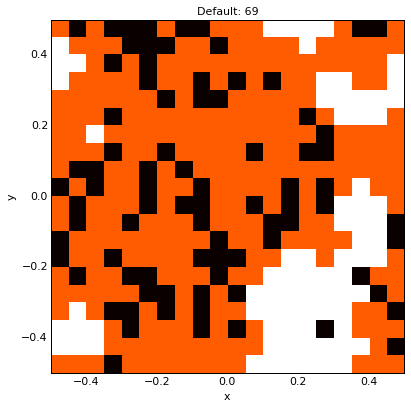
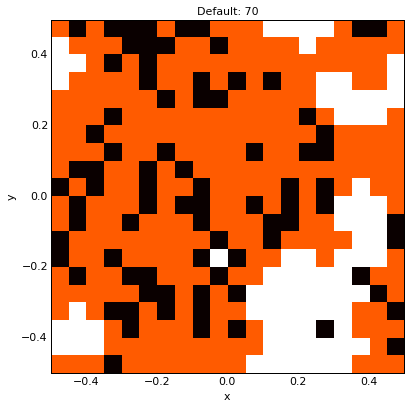
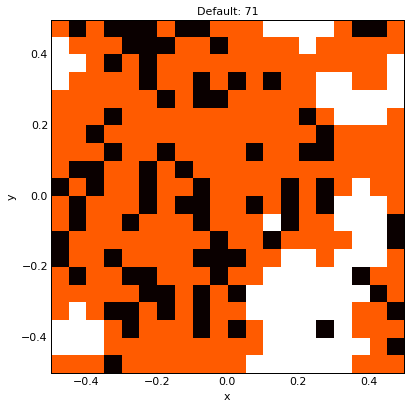
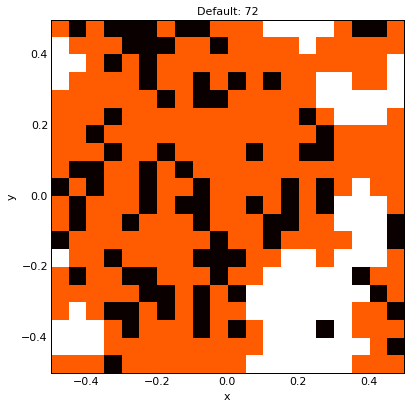
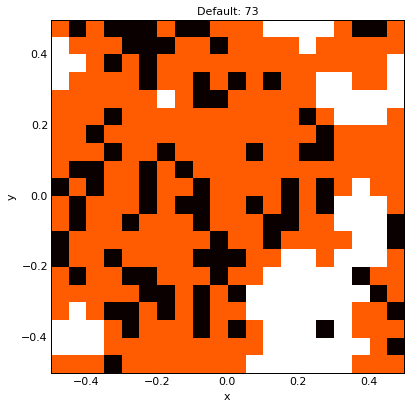
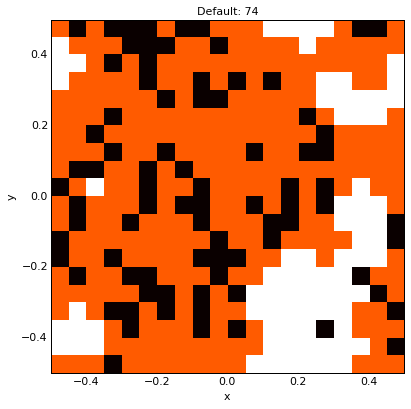
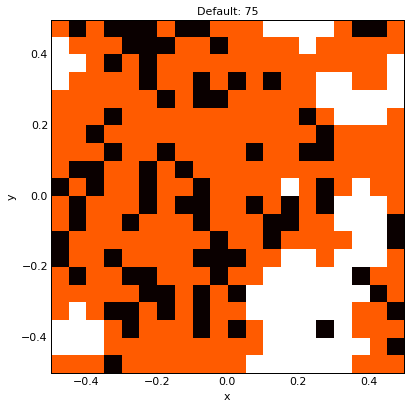
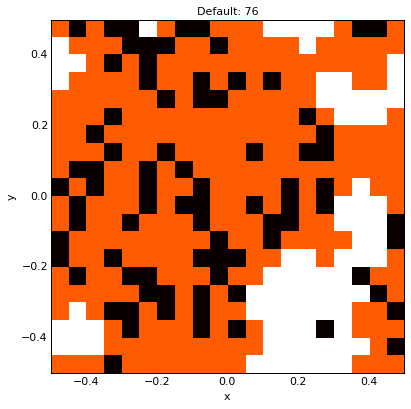
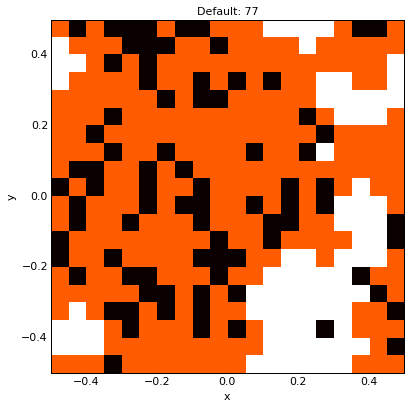
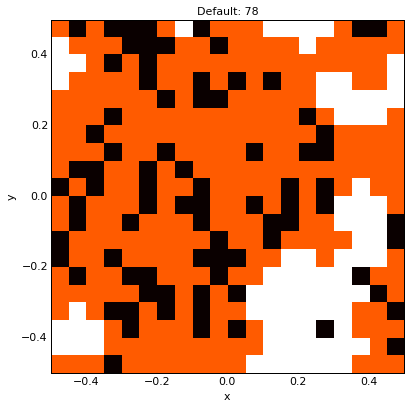
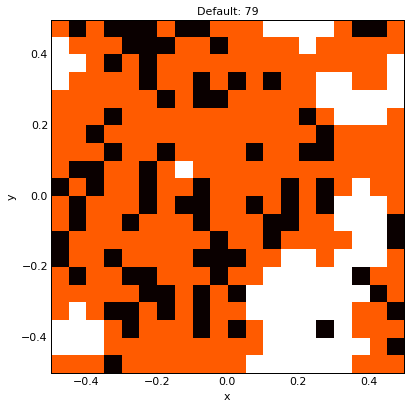
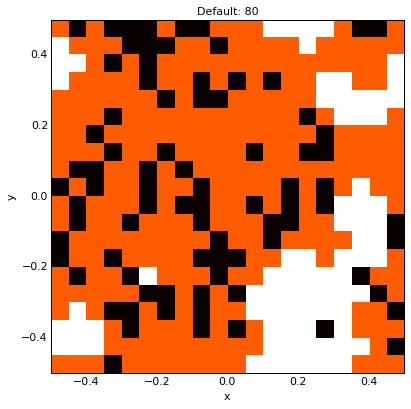
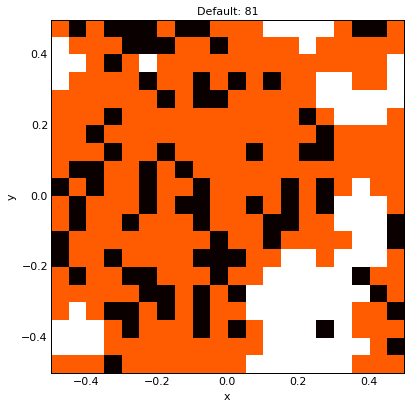
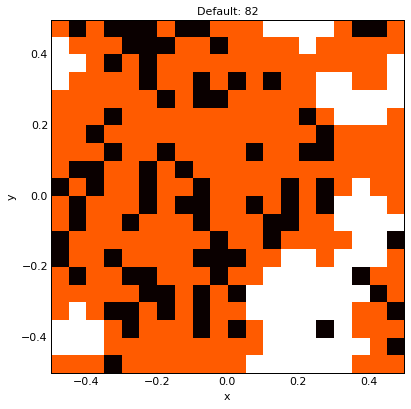
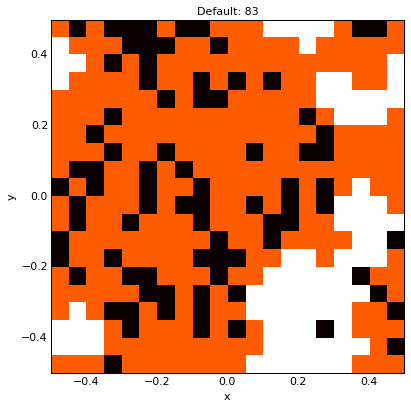
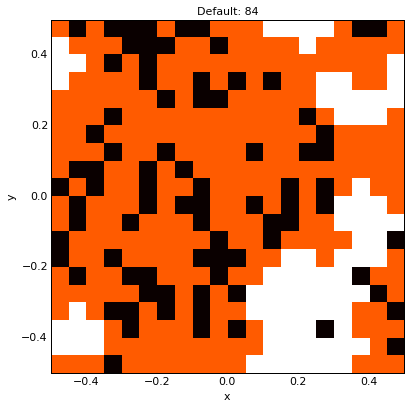
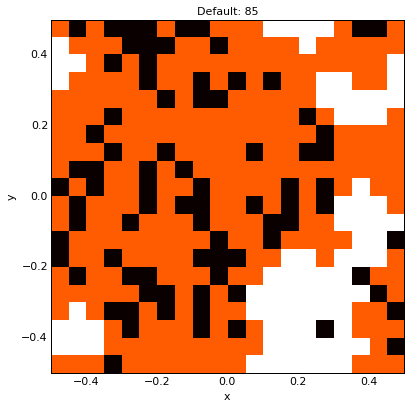
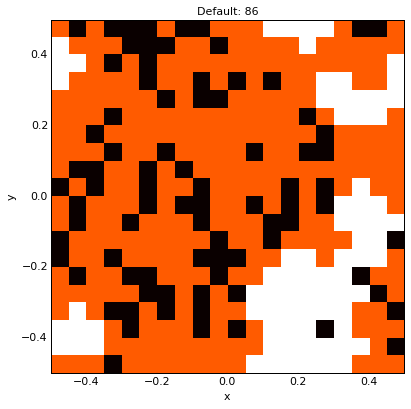
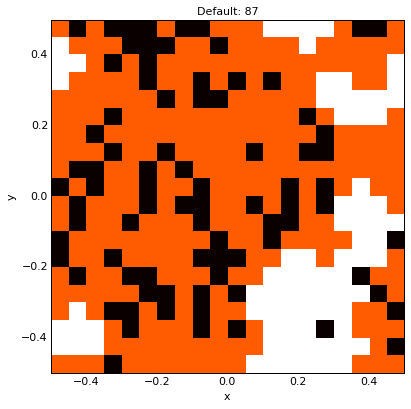
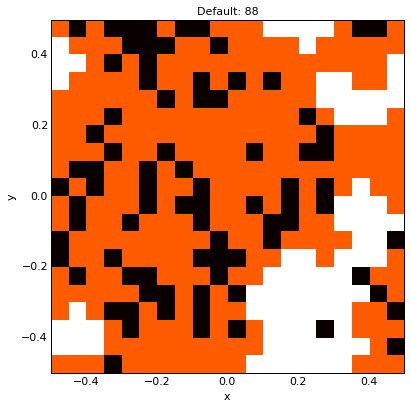
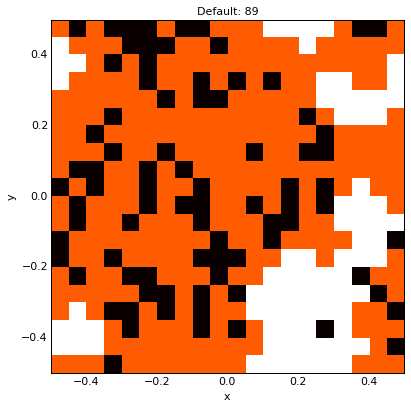
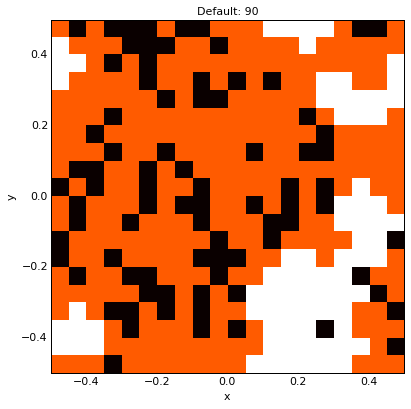
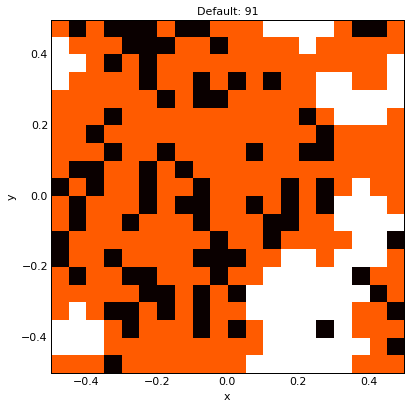
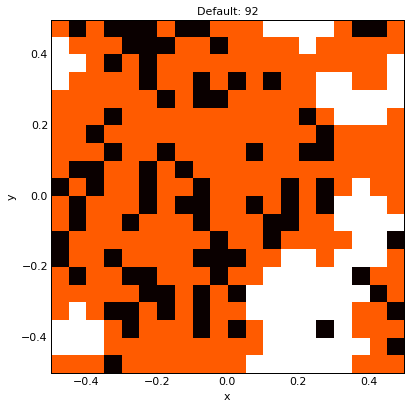
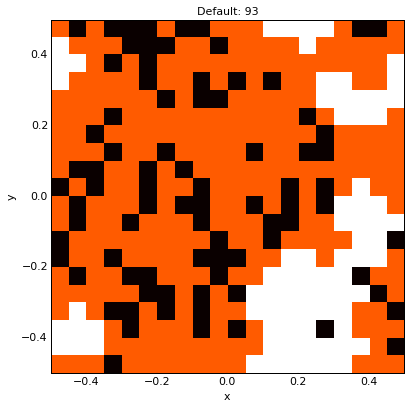
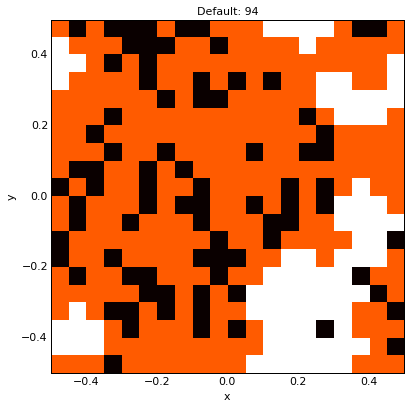
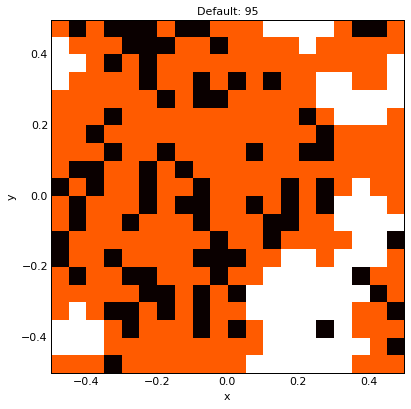
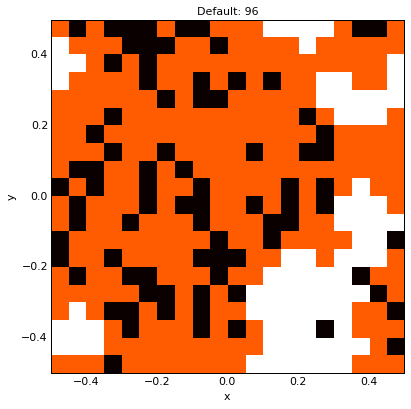
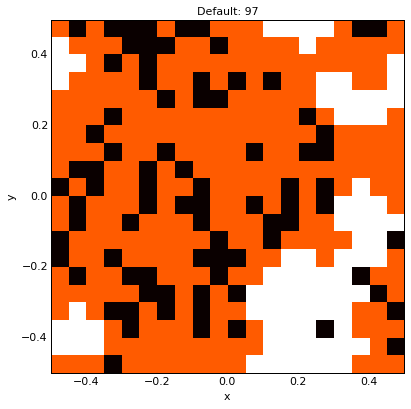
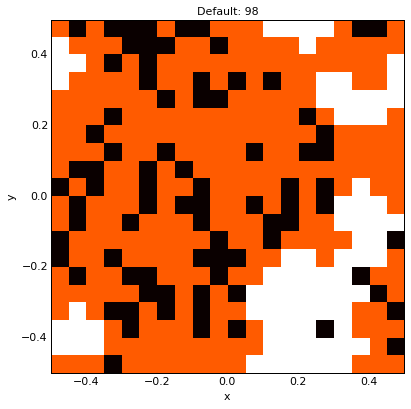
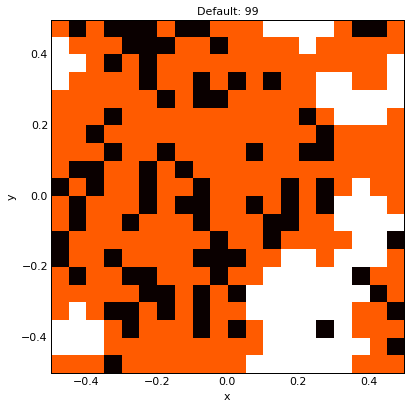

In [25]:
%%opts Image plot[figure_inches=(7,7)]
hmap

http://nbviewer.ipython.org/gist/jlstevens/9c7835e4e21c5d844ded